# Installation

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import numpy as np
from tqdm import tqdm
import random
import datasets
from blur.backend.models import FaceDetector
from blur.backend.utils import seed_everything
from blur.backend.drawing import draw_prediction
from blur.backend.config import CFG, CUSTOM_FACE_PATH

In [21]:
dataset = datasets.load_from_disk(str(CUSTOM_FACE_PATH))

# Make prediction

In [48]:
detector = FaceDetector(cfg=CFG)

In [58]:
seed_everything()

data = dataset["train"]
idx = random.sample(range(len(data)), k = 12)
images = data[idx]['image']

all_boxes = []
for image in tqdm(images):
    boxes = detector.detect_faces(np.array(image))
    all_boxes.append(boxes)

100%|███████████████████████████████████████████| 12/12 [00:05<00:00,  2.23it/s]


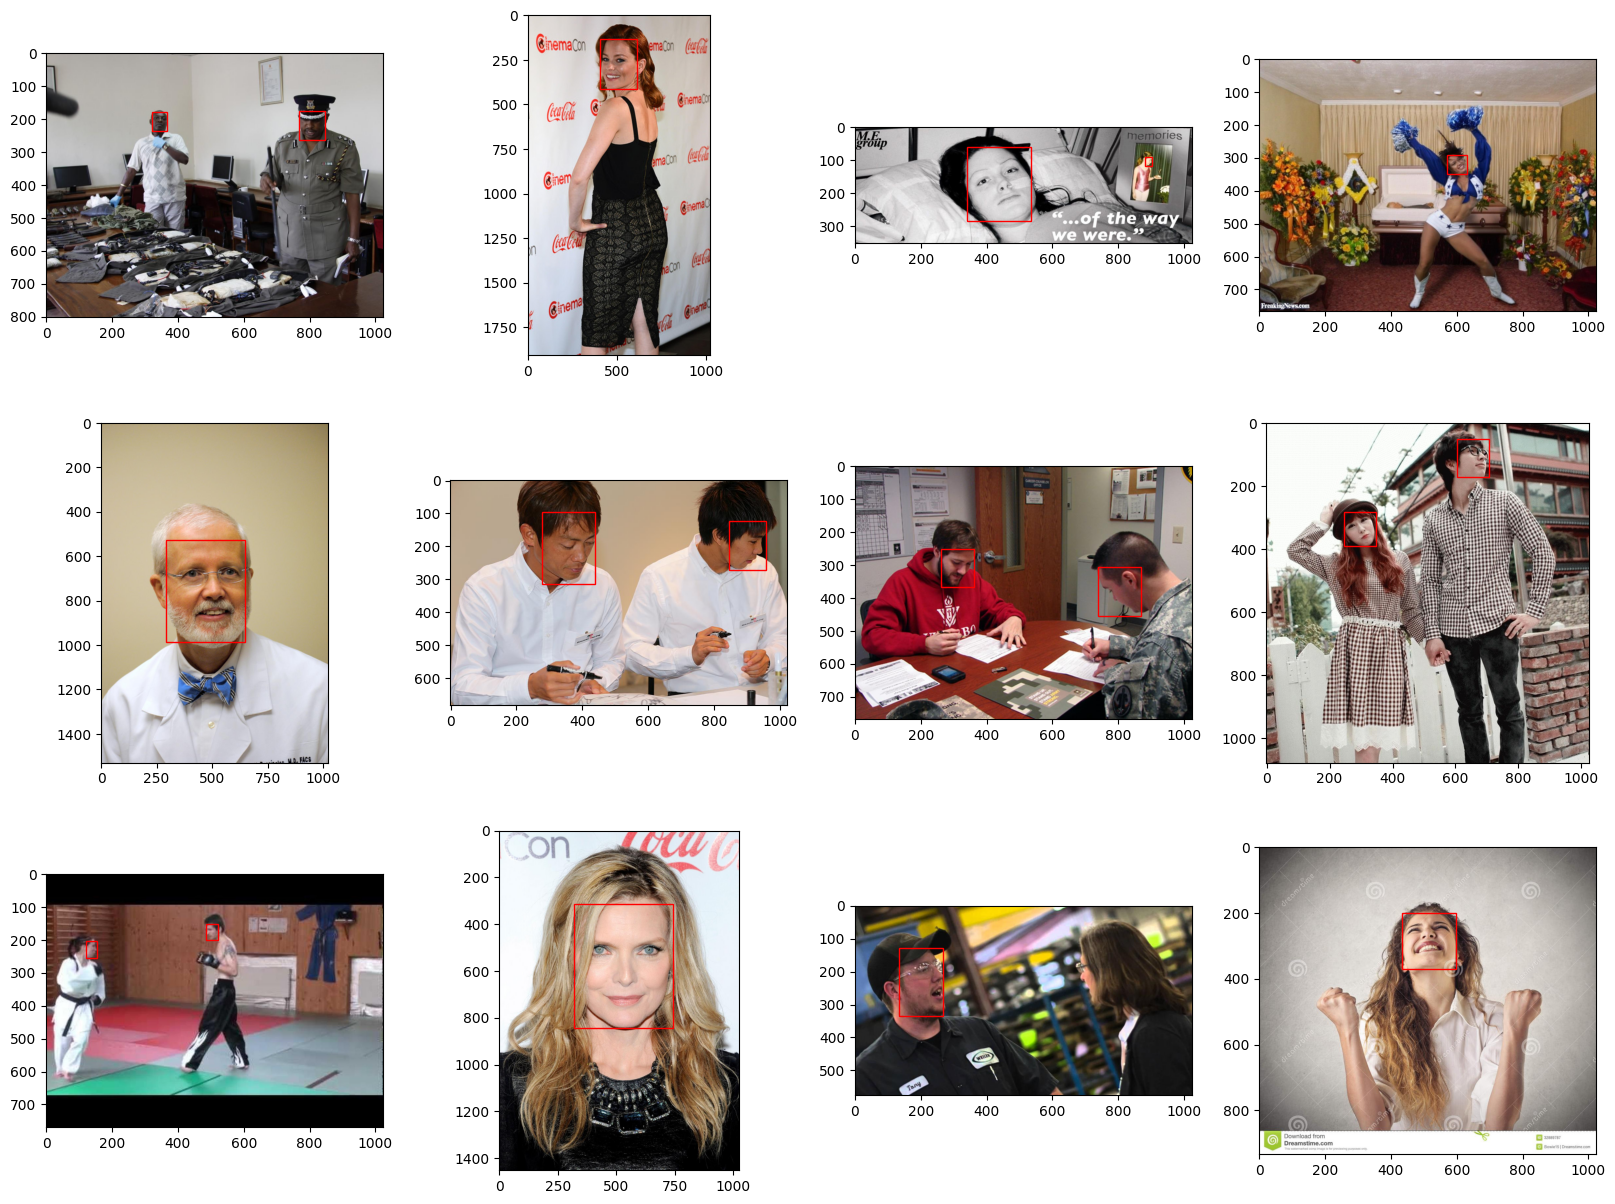

In [60]:
draw_prediction(images, all_boxes)